### Intro to Regression with Decision Trees

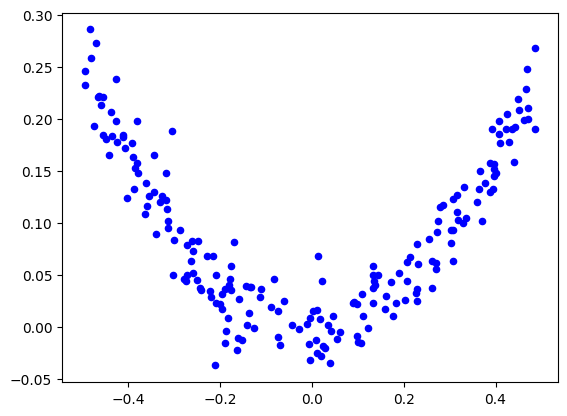

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(200, 1) - 0.5 #X: [200,1]
Y = X ** 2 + 0.025* np.random.randn(200,1) #Y: [200,1]
plt.scatter(X,Y, s=20, c="b")

In [2]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X,Y)

DecisionTreeRegressor(random_state=42)

In [3]:
from sklearn.tree import export_text
print(export_text(tree_reg))

|--- feature_0 <= -0.30
|   |--- feature_0 <= -0.41
|   |   |--- feature_0 <= -0.45
|   |   |   |--- feature_0 <= -0.48
|   |   |   |   |--- feature_0 <= -0.49
|   |   |   |   |   |--- feature_0 <= -0.49
|   |   |   |   |   |   |--- value: [0.23]
|   |   |   |   |   |--- feature_0 >  -0.49
|   |   |   |   |   |   |--- value: [0.25]
|   |   |   |   |--- feature_0 >  -0.49
|   |   |   |   |   |--- feature_0 <= -0.48
|   |   |   |   |   |   |--- value: [0.29]
|   |   |   |   |   |--- feature_0 >  -0.48
|   |   |   |   |   |   |--- value: [0.26]
|   |   |   |--- feature_0 >  -0.48
|   |   |   |   |--- feature_0 <= -0.47
|   |   |   |   |   |--- value: [0.19]
|   |   |   |   |--- feature_0 >  -0.47
|   |   |   |   |   |--- feature_0 <= -0.47
|   |   |   |   |   |   |--- value: [0.27]
|   |   |   |   |   |--- feature_0 >  -0.47
|   |   |   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |  

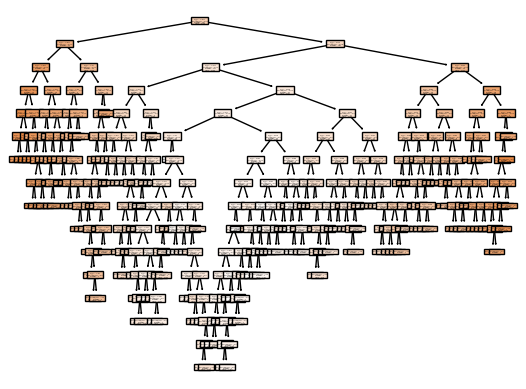

In [4]:
from sklearn.tree import plot_tree
_=plot_tree(tree_reg, filled=True)

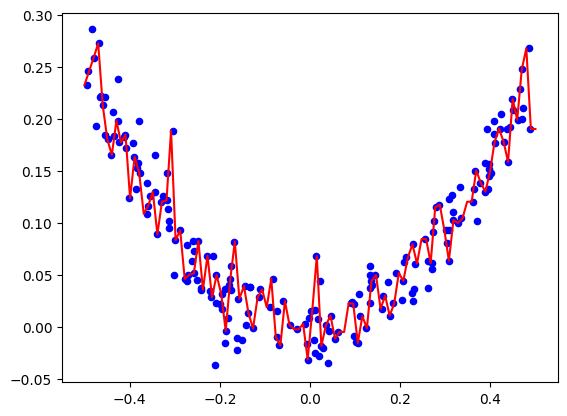

In [5]:
xx = np.linspace(-0.5, 0.5, 100)[:, np.newaxis]
y_pred = tree_reg.predict(xx)
plt.plot(xx, y_pred, c="r")
plt.scatter(X,Y, s=20, c="b")

### What happened?

> Overfit happened!

The Decision Tree class has a few parameters that restrict the shape of the decision tree:

- max_depth: The maximum depth of the decision tree
- max_features: Maximum number of features that are evaluated for splitting at each node
- max_leaf_nodes: Maximum number of leaf nodes
- min_samples_split: Minimum number of samples a node must have before it can be split
- min_samples_leaf: Minimum number of samples a leaf node must have to be created
- min_weight_fraction_leaf: Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances


In [6]:
tree_reg = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg.fit(X,Y)

DecisionTreeRegressor(max_depth=3, random_state=42)

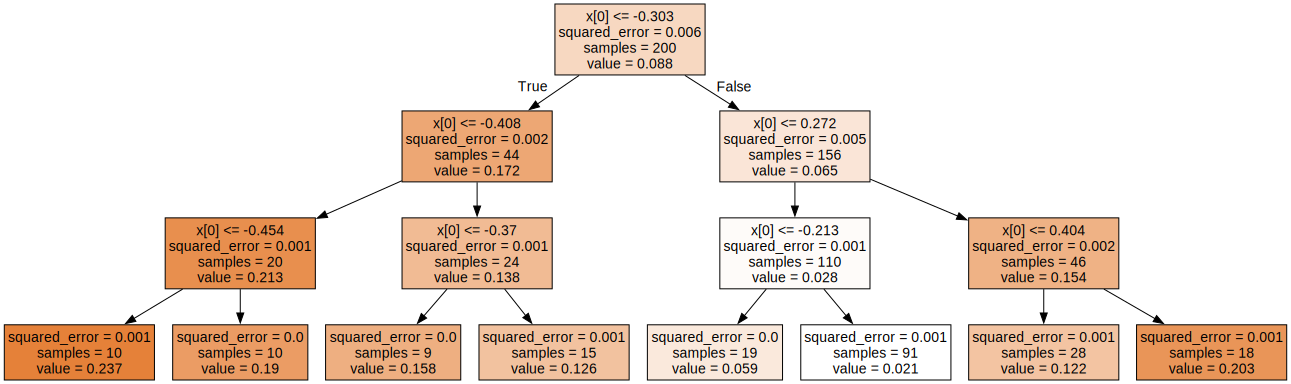

In [7]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(tree_reg, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

Text(0, 0.5, 'target y')

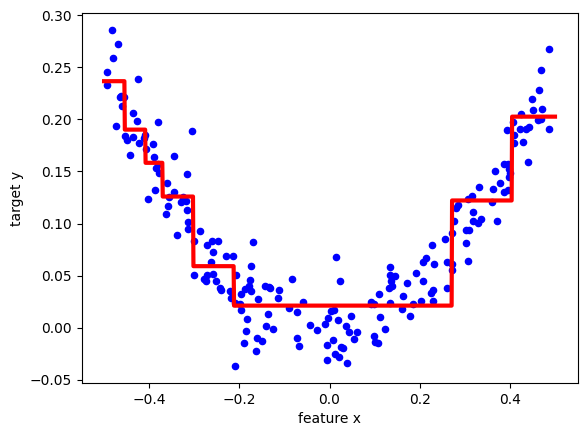

In [8]:
xx = np.linspace(-0.5, 0.5, 1000)[:, np.newaxis]
y_pred = tree_reg.predict(xx)
plt.plot(xx, y_pred, c="r", linewidth=3)
plt.scatter(X,Y, s=20, c="b")
plt.xlabel("feature x")
plt.ylabel("target y")


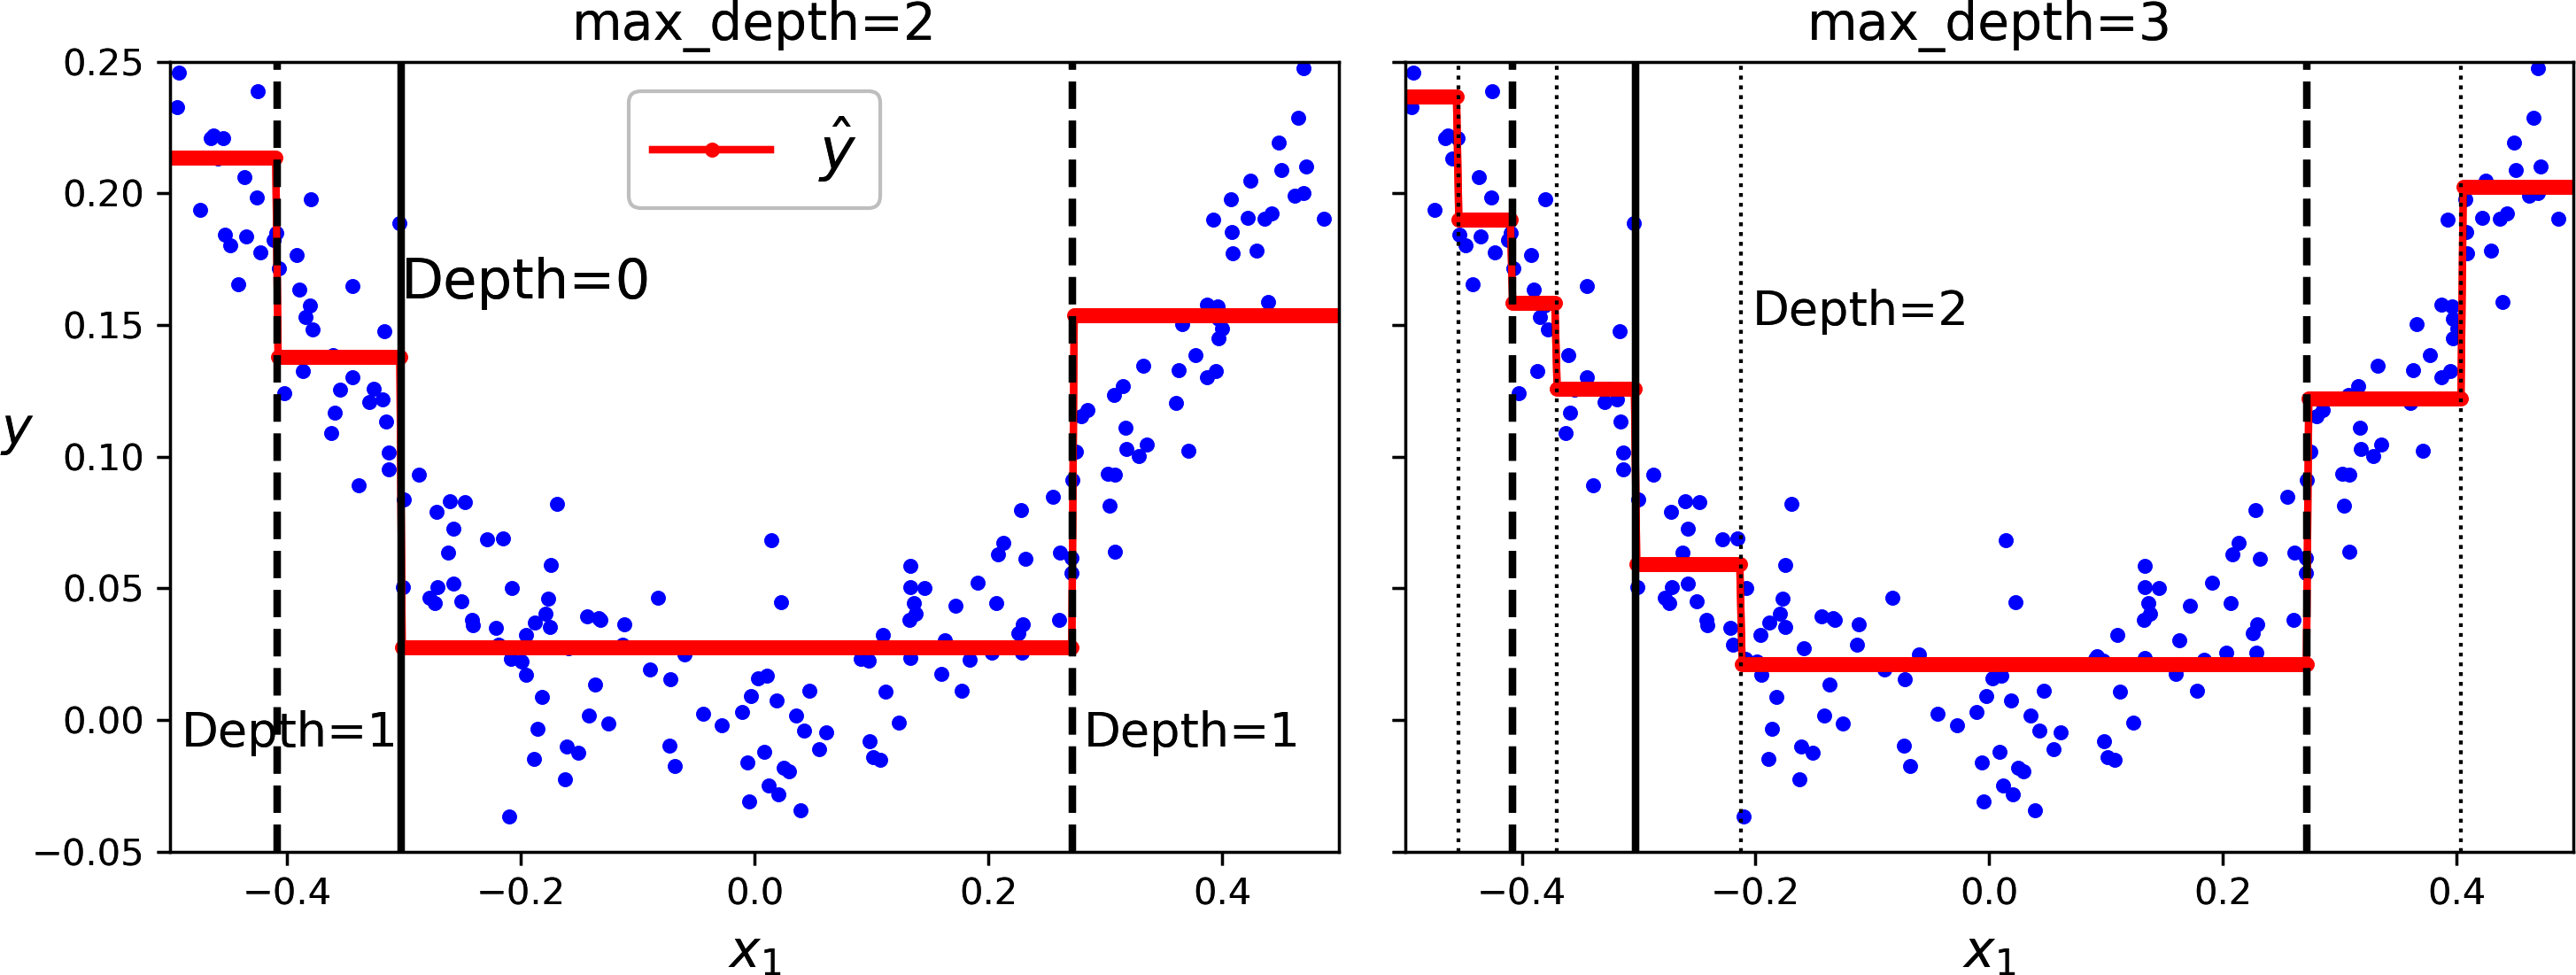